In [1]:
import numpy as np 
import pandas as pd

In [3]:
data = pd.read_csv("nlp_data_clean.csv")

In [4]:
data

,x,y
0,go straight down the road,3
1,proceed in a straight line,3
2,move forward without turning,3
3,continue straight ahead on this path,3
4,head directly down the street,3
...,...,...
2052,reach the coe block,19
2053,aim for the coe block,19
2054,target the coe block,19
2055,get to the coe block,19


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

2024-06-20 12:27:45.523800: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
x = data['x']
y = data['y']

In [8]:
token = Tokenizer()
token.fit_on_texts(x)
sequences = token.texts_to_sequences(x)

In [ ]:
x = pad_sequences(sequences)

In [25]:
x

array([[  0,   0,   0, ..., 104,   1, 109],
       [  0,   0,   0, ...,  13,  16,  79],
       [  0,   0,   0, ...,  59,  62,  80],
       ...,
       [  0,   0,   0, ...,   1,  43,   3],
       [  0,   0,   0, ...,   1,  43,   3],
       [  0,   0,   0, ...,   1,  43,   3]], dtype=int32)

In [33]:
new_x = {
    'x0':[],
    'x1':[],
    'x2':[],
    'x3':[],
    'x4':[],
    'x5':[],
    'x6':[],
    'x7':[],
    'x8':[],
    'x9':[],
    'x10':[],
    'x11':[],
    'y':y
}


In [34]:
new_x

{'x0': [],
 'x1': [],
 'x2': [],
 'x3': [],
 'x4': [],
 'x5': [],
 'x6': [],
 'x7': [],
 'x8': [],
 'x9': [],
 'x10': [],
 'x11': [],
 'y': 0        3
 1        3
 2        3
 3        3
 4        3
         ..
 2052    19
 2053    19
 2054    19
 2055    19
 2056    19
 Name: y, Length: 2057, dtype: int64}

In [35]:
# this code conver a single x feathure into  12 feathures
for i in range(len(x)):
    for j in range(len(x[0])):
        new_x[f'x{j}'].append(x[i][j])

In [37]:
x[0][11]

109

In [36]:
new_x['x11'][0] #success

109

In [38]:
data = pd.DataFrame(new_x)

In [39]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,0,0,0,0,0,0,0,11,16,104,1,109,3
1,0,0,0,0,0,0,0,21,4,13,16,79,3
2,0,0,0,0,0,0,0,0,9,59,62,80,3
3,0,0,0,0,0,0,115,16,92,20,173,35,3
4,0,0,0,0,0,0,0,12,24,104,1,174,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,0,0,0,0,0,0,0,0,114,1,43,3,19
2053,0,0,0,0,0,0,0,120,73,1,43,3,19
2054,0,0,0,0,0,0,0,0,121,1,43,3,19
2055,0,0,0,0,0,0,0,122,2,1,43,3,19


# save the Tokenize

In [12]:
import pickle

In [14]:
pickle.dump(token, open('tokenizer.pkl','wb'))

In [15]:
!ls

Token_data.ipynb       nlp_data_clean.csv     train.csv
final.ipynb            nlp_data_clean_add.csv
model.pkl              tokenizer.pkl


In [17]:
tt = pickle.load(open('tokenizer.pkl','rb'))

In [19]:
tt.word_index == token.word_index

True

# build a model

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier()

In [22]:
rfc

RandomForestClassifier()

In [ ]:
x = data[['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11']]
y = data['y']

In [40]:
len(x) == len(y)

True

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [43]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
y_predict = rfc.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_predict)

In [48]:
score

0.5048543689320388

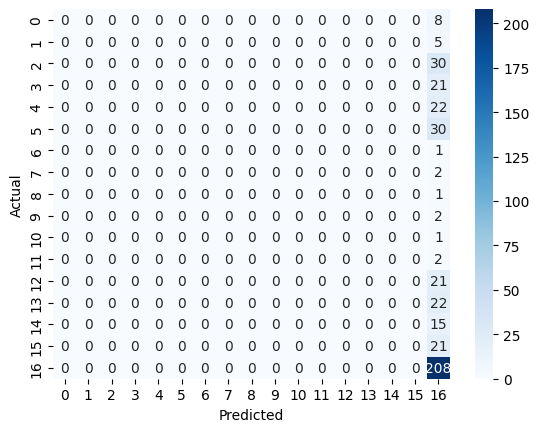

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
